# Reducción de Ruido con BM3D
Este notebook demuestra la aplicación del algoritmo **Block-Matching and 3D Filtering (BM3D)** para la eliminación de ruido en imágenes.

En el framework VCF, este filtro se aplica durante la etapa de **decodificación**.

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display, Image
import sys
sys.path.append('../src')
from visualization import show_results_bm3d


## Método: Block-Matching and 3D Filtering (BM3D)
**BM3D** utiliza el "filtrado colaborativo" agrupando bloques similares en 3D para separar el ruido de la señal original en el dominio de la transformada.

**Parámetros disponibles:**
- `-s_bm3d` o `--sigma_bm3d`: **Desviación estándar del ruido**. Es el parámetro principal de intensidad.
- `-p_bm3d` o `--profile_bm3d`: **Perfil de ejecución**. Permite elegir entre:
    - `np`: Perfil Normal (predeterminado).
    - `lc`: Baja Complejidad (más rápido).
    - `high`: Alta Calidad (más lento).
    - `vn`: Ruido Extremo (para varianzas muy altas).
- `-psd_bm3d` o `--psd_bm3d`: **Densidad Espectral de Potencia**. Permite pasar un archivo `.npy` si el ruido no es blanco (ruido correlacionado).
- `-h_bm3d` o `--psf_bm3d`: **Función de Dispersión de Punto (PSF)**. Si se proporciona un archivo `.npy`, el algoritmo aplica **deblurring** junto con el denoising.

--- 
## Caso 1: Imagen `ruido.jpg`

In [7]:
# 1. Codificar imagen original
!python ../src/no_filter.py encode -i ../img/ruido.jpg -e ../img/ruido_encoded

# 2. Decodificar aplicando BM3D (sigma=15, 30, 50)
!python ../src/BM3D.py decode -i ../img/ruido_encoded.tif -o ../img/bm3d_s15.png --sigma_bm3d 15.0
!python ../src/BM3D.py decode -i ../img/ruido_encoded.tif -o ../img/bm3d_s30.png --sigma_bm3d 30.0
!python ../src/BM3D.py decode -i ../img/ruido_encoded.tif -o ../img/bm3d_s50.png --sigma_bm3d 50.0

main Namespace(debug=False, subparser_name='encode', entropy_image_codec='TIFF', original='../img/ruido.jpg', encoded='../img/ruido_encoded', func=<function encode at 0x0000027E7EE7B920>)


(INFO) entropy_image_coding: Written 1052877 bytes in ../img/ruido_encoded.tif


main Namespace(debug=False, subparser_name='decode', sigma_bm3d=15.0, psd_bm3d=None, psf_bm3d=None, profile_bm3d='np', entropy_image_codec='TIFF', encoded='../img/ruido_encoded.tif', decoded='../img/bm3d_s15.png', func=<function decode at 0x0000017FAC6FA340>)


(INFO) BM3D: Forma de la imagen descomprimida: (600, 899, 3), tipo de dato: uint8
(INFO) BM3D: Aplicando filtro BM3D (sigma_bm3d=15.0, perfil='np')
(INFO) BM3D: Entrada reconocida como RGB. Usando bm3d_rgb.


main Namespace(debug=False, subparser_name='decode', sigma_bm3d=30.0, psd_bm3d=None, psf_bm3d=None, profile_bm3d='np', entropy_image_codec='TIFF', encoded='../img/ruido_encoded.tif', decoded='../img/bm3d_s30.png', func=<function decode at 0x000002789B6CA340>)


(INFO) BM3D: Forma de la imagen descomprimida: (600, 899, 3), tipo de dato: uint8
(INFO) BM3D: Aplicando filtro BM3D (sigma_bm3d=30.0, perfil='np')
(INFO) BM3D: Entrada reconocida como RGB. Usando bm3d_rgb.


main Namespace(debug=False, subparser_name='decode', sigma_bm3d=50.0, psd_bm3d=None, psf_bm3d=None, profile_bm3d='np', entropy_image_codec='TIFF', encoded='../img/ruido_encoded.tif', decoded='../img/bm3d_s50.png', func=<function decode at 0x000001F39BE2A340>)


(INFO) BM3D: Forma de la imagen descomprimida: (600, 899, 3), tipo de dato: uint8
(INFO) BM3D: Aplicando filtro BM3D (sigma_bm3d=50.0, perfil='np')
(INFO) BM3D: Entrada reconocida como RGB. Usando bm3d_rgb.


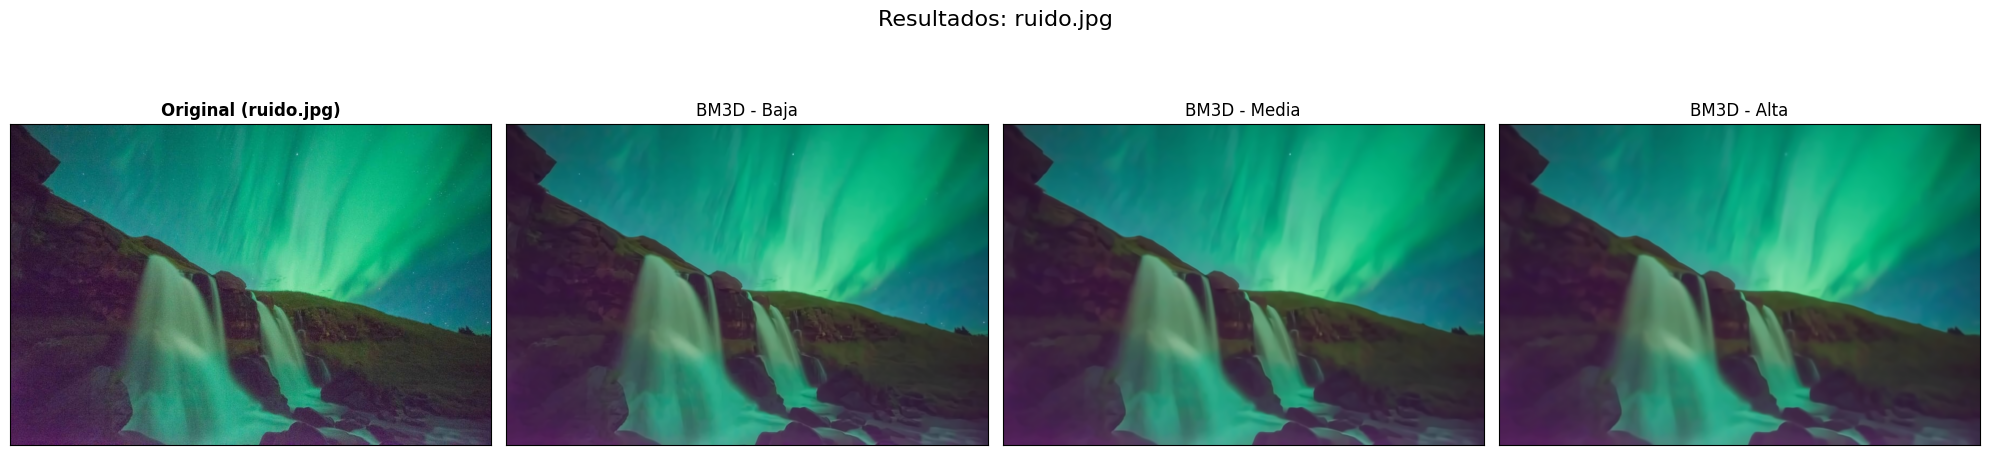

In [8]:
paths_ruido = ['../img/bm3d_s15.png', '../img/bm3d_s30.png', '../img/bm3d_s50.png']
show_results_bm3d('ruido.jpg', '../img/ruido.jpg', paths_ruido)

--- 
## Caso 2: Imagen `hombre.jpg`

In [9]:
# 1. Codificar imagen original
!python ../src/no_filter.py encode -i ../img/hombre.jpg -e ../img/hombre_encoded

# 2. Decodificar aplicando BM3D (sigma=15, 30, 50)
!python ../src/BM3D.py decode -i ../img/hombre_encoded.tif -o ../img/hombre_bm3d_s15.png --sigma_bm3d 15.0
!python ../src/BM3D.py decode -i ../img/hombre_encoded.tif -o ../img/hombre_bm3d_s30.png --sigma_bm3d 30.0
!python ../src/BM3D.py decode -i ../img/hombre_encoded.tif -o ../img/hombre_bm3d_s50.png --sigma_bm3d 50.0

main Namespace(debug=False, subparser_name='encode', entropy_image_codec='TIFF', original='../img/hombre.jpg', encoded='../img/hombre_encoded', func=<function encode at 0x000001E2F69AB920>)


(INFO) entropy_image_coding: Written 975845 bytes in ../img/hombre_encoded.tif


main Namespace(debug=False, subparser_name='decode', sigma_bm3d=15.0, psd_bm3d=None, psf_bm3d=None, profile_bm3d='np', entropy_image_codec='TIFF', encoded='../img/hombre_encoded.tif', decoded='../img/hombre_bm3d_s15.png', func=<function decode at 0x00000137F22EA340>)


(INFO) BM3D: Forma de la imagen descomprimida: (800, 1200, 3), tipo de dato: uint8
(INFO) BM3D: Aplicando filtro BM3D (sigma_bm3d=15.0, perfil='np')
(INFO) BM3D: Entrada reconocida como RGB. Usando bm3d_rgb.


main Namespace(debug=False, subparser_name='decode', sigma_bm3d=30.0, psd_bm3d=None, psf_bm3d=None, profile_bm3d='np', entropy_image_codec='TIFF', encoded='../img/hombre_encoded.tif', decoded='../img/hombre_bm3d_s30.png', func=<function decode at 0x0000024526C7A340>)


(INFO) BM3D: Forma de la imagen descomprimida: (800, 1200, 3), tipo de dato: uint8
(INFO) BM3D: Aplicando filtro BM3D (sigma_bm3d=30.0, perfil='np')
(INFO) BM3D: Entrada reconocida como RGB. Usando bm3d_rgb.


main Namespace(debug=False, subparser_name='decode', sigma_bm3d=50.0, psd_bm3d=None, psf_bm3d=None, profile_bm3d='np', entropy_image_codec='TIFF', encoded='../img/hombre_encoded.tif', decoded='../img/hombre_bm3d_s50.png', func=<function decode at 0x0000021BBDA3A340>)


(INFO) BM3D: Forma de la imagen descomprimida: (800, 1200, 3), tipo de dato: uint8
(INFO) BM3D: Aplicando filtro BM3D (sigma_bm3d=50.0, perfil='np')
(INFO) BM3D: Entrada reconocida como RGB. Usando bm3d_rgb.


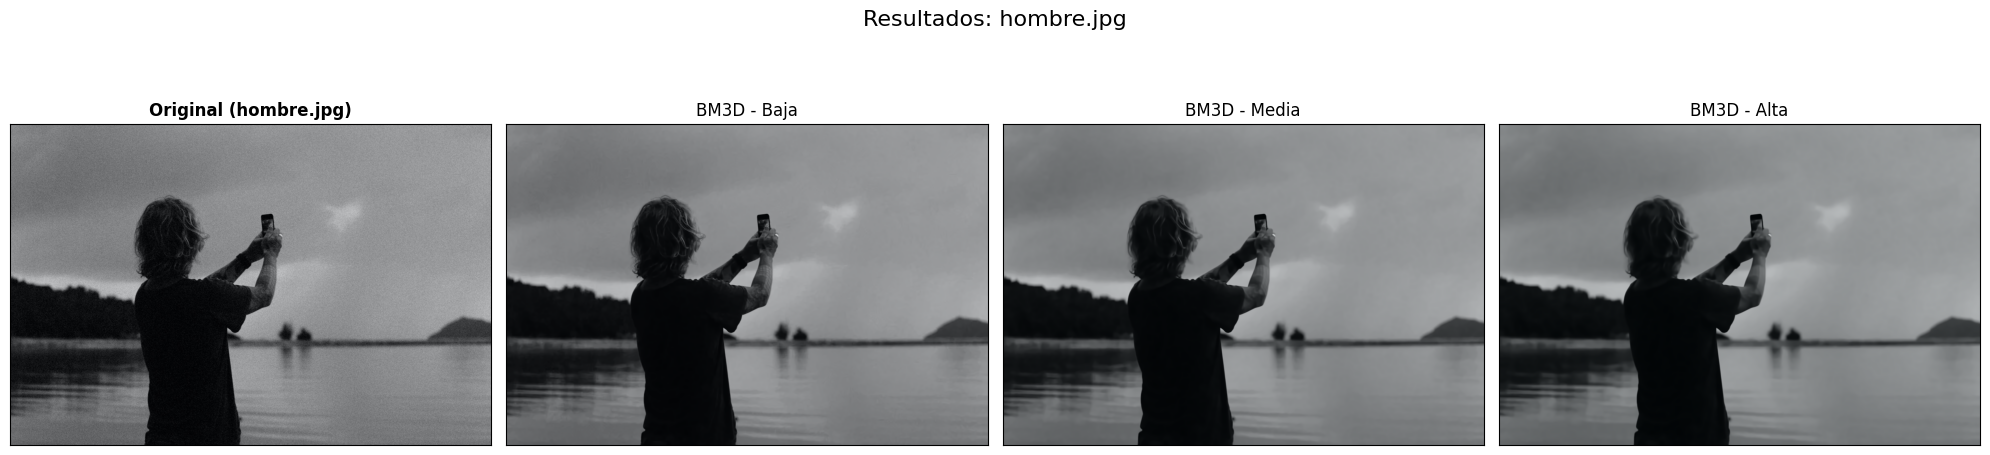

In [10]:
paths_hombre = ['../img/hombre_bm3d_s15.png', '../img/hombre_bm3d_s30.png', '../img/hombre_bm3d_s50.png']
show_results_bm3d('hombre.jpg', '../img/hombre.jpg', paths_hombre)